<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
    <h2> Комментарий ревьюера <a class="tocSkip"></a></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
    <h2> Комментарий студента: <a class="tocSkip"></a> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

 <div class="alert alert-success">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах
</div>

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, HTML
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error, make_scorer


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor #v2

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = {} # буду вместо уникальных имен использовать итерабельные объекты, чтобы использовать в циклах
data_list = ['train', 'test', 'full']
try:
    for i in data_list: data[i] = pd.read_csv('/datasets/gold_industry_' + i + '.csv', parse_dates=['date'])
    print('Данные загружены из локальной папки в облаке')
except:
    try:
        for i in data_list: data[i] = pd.read_csv(
            '/home/padla/git/ds-72_12-assembled-project-2_cross-review/df/gold_industry_'
            + i + '.csv', parse_dates=['date'])
        print('Данные загружены из локальной папки на локальной машине')
    except:
        for i in data_list: data[i] = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_'
            + i + '.csv', parse_dates=['date'])
        print('Данные загружены из облака')
data = pd.Series(data) # чтобы можно было использовать "." нотацию. Экономия 3 символов

Данные загружены из локальной папки на локальной машине


In [4]:
MULTICOLLINEARITY_THRESHOLD = [- 0.6, 0.6]
RANDOM_STATE = 1

In [5]:
display(f"Явных дубликатов: {[data[i].duplicated().sum() for i in data_list]}")
display(f"Дубликатов в поле date: {[data[i]['date'].duplicated().sum() for i in data_list]}")
pd.DataFrame([data[i].date.describe(datetime_is_numeric=True) for i in data_list], index=data_list)[['min', 'max']]

'Явных дубликатов: [0, 0, 0]'

'Дубликатов в поле date: [0, 0, 0]'

,min,max
train,2016-01-15 00:00:00,2017-12-09 13:59:59
test,2017-12-09 14:59:59,2018-08-18 10:59:59
full,2016-01-15 00:00:00,2018-08-18 10:59:59


In [6]:
for i in data_list:
    print(f'Датафрейм: {i}')
    data[i].info();
    print()

Датафрейм: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64  

Столбцов много. Составим дополнительную таблицу, для облегчения фильтрации:

In [7]:
columns = {}
columns['all'] = set()
for i in data_list: columns['all'].update(data[i].columns)
columns = pd.DataFrame(index=sorted(columns['all']), columns=['all'], data=np.full(len(columns['all']),True))

def swap_columns(df, col1, col2):
    '''
    Замена местами 2 столбцов
    '''
    col_list = list(df.columns )
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

# ставим столбцы с au перед ag для облегчения восприятия (не хочется создавать отдельную функцию для sorted)
tmp = columns[columns.apply(lambda x: '_ag' in x.name ,axis=1)].index
for i in tmp:
    columns = swap_columns(columns.T, i, i.replace('_ag', '_au')).T

tmp = pd.DataFrame(columns=columns['all'].index, index=['train', 'test', 'full', 'summ'])
for i in data_list:
    for j in data[i].columns: tmp.loc[i,j] = 1
tmp.loc['summ'] = tmp.iloc[:3].sum()
columns['missing'] = tmp.T.summ.apply(lambda x: x < 3)
columns['present'] = tmp.T.summ.apply(lambda x: x == 3)

columns['rougher'] = columns.apply(lambda x: 'rougher' in x.name ,axis=1)
columns['final'] = columns.present

columns.T

,date,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.au_pb_ratio,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.sulfate_to_au_concentrate,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
all,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
missing,False,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
present,True,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,Tr

* Сделаем копию датафрейма test, которую в дальнейшим нормализуем (чтобы не нормализовать каждый раз при подборе гиперпараметров). Это позволит ускорить вычисления (~ 6 * 50 * 1.5 секунд).
* Сделаем вырезку из датафрейма full, в которой будут только данные из временного диапазона датафрейма test

In [8]:
data['train_norm'] = data.train.apply(copy.deepcopy) # необходима возможность независимого редактирования
data['test_full'] = data.full[data.full.date > data.train.date.max()].reset_index(drop=True)

# Для возможности обучения переведем дату в int
for i in ['train', 'test', 'train_norm', 'test_full']:
    data[i]['date_src'] = data[i].date
    data[i].date = data[i].date.astype(int)/1e9

In [9]:
USE_DATE = False # использовать ли дату для обучения моделей
if USE_DATE:
    for i in ['present', 'rougher']: columns.loc['date', i] = True
else: columns.loc['date', 'present'] = False

Столбцы, отсутствующие в тестовой выборке (стадия флотации):

In [10]:
columns[columns.missing & columns.rougher].index

Index(['rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.recovery', 'rougher.output.tail_au',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol'],
      dtype='object')

Как и следовало ожидать, столбцы `rougher.output.concentrate_au` и `rougher.output.tail_au`, необходимые для рассчета `recovery` отсутствуют.

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
</div>

In [11]:
# нужен как нормализованный столбец, так и исходный
for i in ['train_norm', 'train', 'test', 'test_full']:
    data[i]['rougher.input.feed_au_src'] = data[i]['rougher.input.feed_au']

In [12]:
def recovery(*, c, f, t): return (c * (f - t) / (f * (c - t) + (1e-21))) * 100

# не нашел, как корректно передавать в оценщик параметры из pipline, поэтому костыли через глобальные переменные
score_stage = 'rougher'
score_df = data.train

def mae_recovery(target, predict):
    global score_stage
    global score_df
    #print(f'mae_recovery: {stage=}') # debug: проверка, передался ли параметр из pipeline
    df1=score_df.loc[target.index] # индексы, захваченые при кросс-валидации
    f = df1['rougher.input.feed_au_src'] # if stage == 'rougher' else df1['rougher.output.concentrate_au']
    if str(type(predict)) == "<class 'pandas.core.frame.DataFrame'>": predict=predict.to_numpy()
    c = predict[:,0] # ['rougher.output.concentrate_au'] ['final.output.concentrate_au']
    t = predict[:,1] # ['rougher.output.tail_au'] ['final.output.tail_au']
    recovery_predict = recovery(c=c, f=f, t=t)
    recovery_target = df1['rougher.output.recovery'] if score_stage == 'rougher' else df1['final.output.recovery']
    return mean_absolute_error(recovery_target, recovery_predict)

score = make_scorer(mae_recovery, greater_is_better=False) # сразу оценщик для моделей

for i in ['rougher', 'final']:
    score_stage = i
    tmp = mae_recovery(data.train[i+'.output.recovery'],
        data.train[[i+'.output.concentrate_au', i+'.output.tail_au']])
    display(f'{score_stage=} mae={tmp}')

"score_stage='rougher' mae=9.83758577644259e-15"

"score_stage='final' mae=8.569602032360358e-15"

recovery корректно рассчитывается для флотации, но для финальной стадии в качестве f вместо `rougher.output.concentrate_au` на производстве используется `rougher.input.feed_au`. Так поступим и мы.

<div class="alert alert-success">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>

<b>Все отлично!👍:</b> 
    
Твое расссчитанное значение `MAE` верно) 

Полученное значение оказалось в достаточной степени маленьким, чтобы можно было утверждать о правильности рассчёта.
</div>

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
</div>

In [13]:
for i in ['missing', 'present']: display(columns[columns[i]].index)

Index(['final.output.concentrate_au', 'final.output.concentrate_ag',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_au', 'final.output.tail_ag',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Index(['primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_au',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Параметры, отсутствующие в тестовой выборке, относятся к online параметрам. Показывают фактические параметры после обогощения, которые заранее недоступны.

<div class="alert alert-success">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>

<b>Все отлично!👍:</b> 
    
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, ведь их невозможно получить либо замерить во время выполнения технологического процесса
</div>

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
1.4. Проведите предобработку данных.
</div>

Заполнение пропусков и нормализация:

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* Я сначала думал средним между 2 значениями восстановить, но там почти везде график ни разу не монотонный, и часто вообще похоже на аварийный останов. Поэтому отказался от этой идеи. Подумалось, что надежнее смотреть и на другие переменные.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

secondary_cleaner.state.floatbank6_a_air              1
rougher.calculation.sulfate_to_au_concentrate         1
final.output.tail_ag                                  1
rougher.output.tail_ag                                1
rougher.calculation.floatbank10_sulfate_to_au_feed    1
dtype: int64

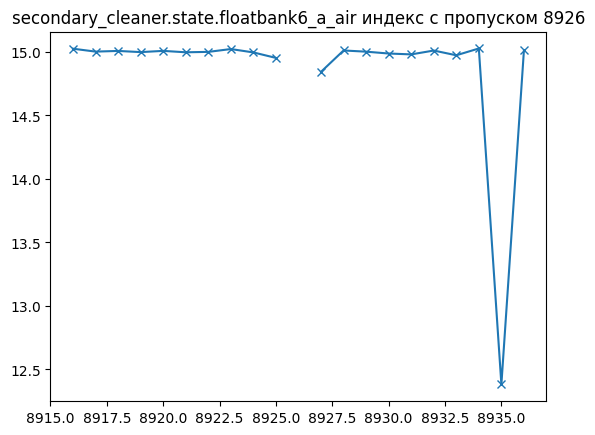

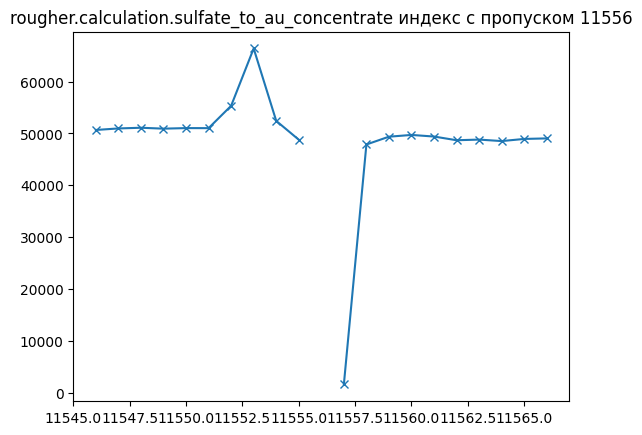

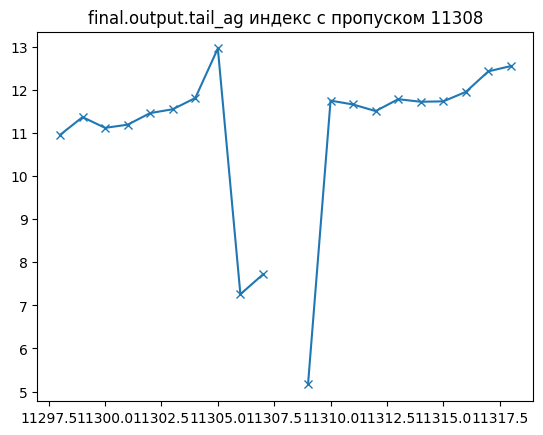

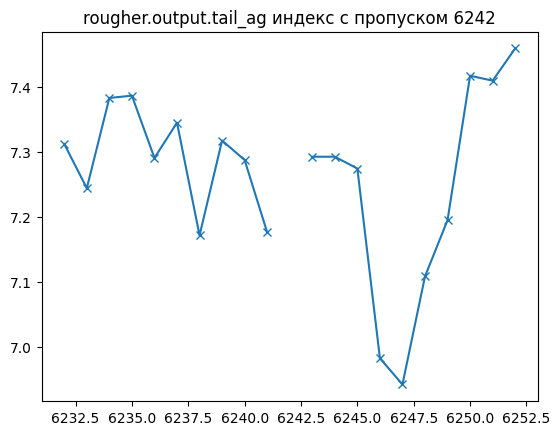

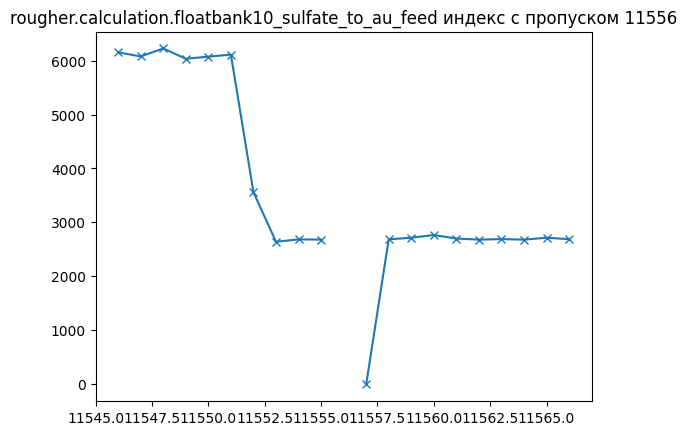

In [14]:
# ячейка добавлена в v2
tmp = data.train.isna().sum().sort_values()
tmp_rows = tmp[tmp>0].head().index
display(tmp[tmp>0].head())
for i in tmp_rows:
    tmp = data.train[i]
    tmp1 = tmp[tmp.isna()].index.to_list()[0]
    tmp2=10
    tmp[tmp1-tmp2:tmp1+tmp2+1].plot(style='x-', title = f'{i} индекс с пропуском {tmp1}')
    plt.show()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* Добавил ниже код для отсечения полностью пустой породы и время профилактики в primary_cleaner
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [15]:
# эта ячейка добавлена в версии v2
elements = ['au', 'ag', 'pb', 'sol']
filds = ['rougher.input.feed_', 'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
tmp = 0.02
for df in [data.train, data.train_norm]:
    for stage in filds:
        fild = sum([df[stage + i] for i in elements])
        df.drop(fild[fild < 0.01].index, inplace=True)
    profilactic = sum([df['primary_cleaner.output.concentrate_' + element] for element in elements])
    display(f'количество профилактических записей к удалению:{(profilactic < (tmp * 4)).sum()}')
    df.drop(profilactic[profilactic < (tmp * 4)].index, inplace=True)
    df.reset_index(drop=True , inplace=True)

a=[('primary_cleaner.output.concentrate_' + element) for element in elements]
profilactic = ((data.train['primary_cleaner.output.concentrate_au'] < tmp) |
               (data.train['primary_cleaner.output.concentrate_ag'] < tmp) |
               (data.train['primary_cleaner.output.concentrate_pb'] < tmp) |
               (data.train['primary_cleaner.output.concentrate_sol'] < tmp))
data.train[profilactic][a]

'количество профилактических записей к удалению:98'

'количество профилактических записей к удалению:98'

,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol
8383,0.05659,0.018661,0.021357,0.016416


In [16]:
display(data.train.head(2))


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer())])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, columns[columns.present].index)])
for df in ['train_norm']: # пока нормализуем только 1 датасет
    tmp = pd.DataFrame(preprocessor.fit_transform(data[df][columns[columns.present].index]),
        columns=columns[columns.present].index)
    for column in tmp.columns: data[df][column] = tmp[column]
        
display(data.train_norm.head(2))
display(pd.DataFrame({'isna_sum':[data[df][columns[columns.present].index].isna().sum().sum()
    for df in data.index]}, index=data.index))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,date_src,rougher.input.feed_au_src
0,1.452816e+09,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,2016-01-15 00:00:00,6.486150
1,1.452820e+09,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.28

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,date_src,rougher.input.feed_au_src
0,1.452816e+09,-0.986631,-1.450051,-1.246777,0.044323,0.448167,-0.153005,-0.126863,-0.013023,-0.637797,-0.244438,1.527188,0.533078,1.411953,0.416732,1.817029,0.260692,1.801036,0.133699,2.272653,0.197914,-0.067794,-0.061574,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,-0.428238,0.382612,-0.098165,-0.079122,-0.313701,-0.234750,-0.316641,-0.739238,-0.271786,-0.205437,0.034852,-0.109893,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,-0.483215,0.078384,-0.008475,0.043658,-0.669809,-0.190927,-0.034898,-0.146166,-0.905881,-0.366261,-0.565729,-0.670621,-1.023878,-0.307397,-0.746403,-0.380113,-0.886150,-2.721131,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,2016-01-15 00:00:00,6.486150
1,1.452820e+09,-0.990609,-1.418327,-1.264710,-0.158568,0.464498,-0.073711,-0.131467,-0.014987,-0.634200,-0.202327,1.514697,0.262595,1.402874,0.279024,1.824638,

,isna_sum
train,1140
test,375
full,1795
train_norm,0
test_full,375


Проверка на мультиколлиниарность:

In [17]:
def user_light(x, color1, color2):
    return np.where(x<MULTICOLLINEARITY_THRESHOLD[0], f"background: {color1};",
           np.where(x>MULTICOLLINEARITY_THRESHOLD[1], f"background: {color2};", None))

def get_correlated_metrics(*, data, stage, verbose=True):
    corr=data[columns[columns[stage] & columns.present].index].corr()
    if verbose:
        display(Markdown(f'<hr>{stage=}'))
        display(corr.style.format('{:.2f}').apply(user_light, color1='blue', color2='red'))
    columns['multicollinearity_' + stage]=False
    tmp1=[] # столбцы, по которым уже прошлись
    tmp2=[] # столбцы, корелляция которых превысила порог. В текущем исследовании скорее всего избычточны.
    for i in columns[columns[stage] & columns.present].index:
        tmp1.append(i)
        for j in corr[i].index:
            if (j not in tmp1) and (j not in tmp2) and ((corr[i][j] > MULTICOLLINEARITY_THRESHOLD[1])
                or (corr[i][j] < MULTICOLLINEARITY_THRESHOLD[0])):
                tmp2.append(j)
                columns.loc[j, 'multicollinearity_' + stage] = True
    if verbose: display(f"{len(tmp2)} столбцов имеют корелляцию выше порога и будут исключены из списка \
столбцов для обучения:",tmp2)

get_correlated_metrics(data=data.train_norm, stage='rougher', verbose=True)
get_correlated_metrics(data=data.train_norm, stage='final', verbose=False)

<hr>stage='rougher'

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
rougher.input.feed_au,1.00,0.84,0.72,-0.19,-0.14,0.12,0.26,0.20,0.20,0.19,0.20,-0.05,-0.14,-0.05,-0.14,-0.03,-0.18,-0.03,-0.19,-0.00,-0.20,-0.00
rougher.input.feed_ag,0.84,1.00,0.52,-0.13,-0.10,0.13,0.07,0.23,0.05,0.22,0.31,-0.08,-0.16,-0.08,-0.17,-0.07,-0.20,-0.07,-0.15,-0.07,-0.17,-0.06
rougher.input.feed_pb,0.72,0.52,1.00,-0.14,-0.06,0.10,0.28,0.07,0.24,0.07,0.28,0.26,-0.28,-0.11,-0.28,-0.10,-0.34,-0.10,-0.35,-0.09,-0.31,-0.10
rougher.input.feed_rate,-0.19,-0.13,-0.14,1.00,0.06,0.63,0.28,0.61,0.45,0.61,-0.01,0.13,-0.27,-0.33,-0.30,-0.33,-0.29,-0.32,-0.21,-0.35,-0.22,-0.32
rougher.input.feed_size,-0.14,-0.10,-0.06,0.06,1.00,0.14,-0.04,0.02,-0.18,-0.01,0.15,0.25,-0.08,0.08,-0.11,0.09,-0.12,0.08,-0.02,0.06,0.01,0.04
rougher.input.feed_sol,0.12,0.13,0.10,0.63,0.14,1.00,0.34,0.41,0.38,0.41,0.16,0.31,-0.25,-0.21,-0.28,-0.21,-0.32,-0.20,-0.28,-0.23,-0.25,-0.22
rougher.input.floatbank10_sulfate,0.26,0.07,0.28,0.28,-0.04,0.34,1.00,0.18,0.81,0.09,-0.11,0.24,-0.06,0.07,-0.04,0.08,-0.08,0.09,-0.15,0.08,-0.11,0.10
rougher.input.floatbank10_xanthate,0.20,0.23,0.07,0.61,0.02,0.41,0.18,1.00,0.18,0.90,0.08,0.01,-0.15,-0.31,-0.19,-0.31,-0.18,-0.28,-0.05,-0.29,-0.09,-0.26
rougher.input.floatbank11_sulfate,0.20,0.05,0.24,0.45,-0.18,0.38,0.81,0.18,1.00,0.25,-0.17,0.12,-0.20,-0.18,-0.17,-0.18,-0.20,-0.17,-0.27,-0.16,-0.26,-0.16
rougher.input.floatbank11_xanthate,0.19,0.22,0.07,0.61,-0.01,0.41,0.09,0.90,0.25,1.00,0.06,-0.04,-0.20,-0.38,-0.23,-0.38,-0.22,-0.37,-0.10,-0.36,-0.14,-0.35


'14 столбцов имеют корелляцию выше порога и будут исключены из списка столбцов для обучения:'

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_level']

In [18]:
#data.train_norm.plot.scatter(x='rougher.input.feed_au', y='rougher.input.feed_ag');

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Обработка пропусков таким способом возможна. Обрати пожалуйста внимание, что все наблюдения представляют собой последовательные измерения, заполнинить пропуски можно и  методами `pandas`: `ffill`/ `bfill`/ интерполяцией , это вполне уместно.\
Хочу посоветовать тебе статью, которая рассматривает разные способы обработки пропусков, выделяет их плюсы и минусы, думаю, тебе может быть интересно: https://loginom.ru/blog/missing   
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* Благодарю 🙏  
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Анализ данных

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.
</div>

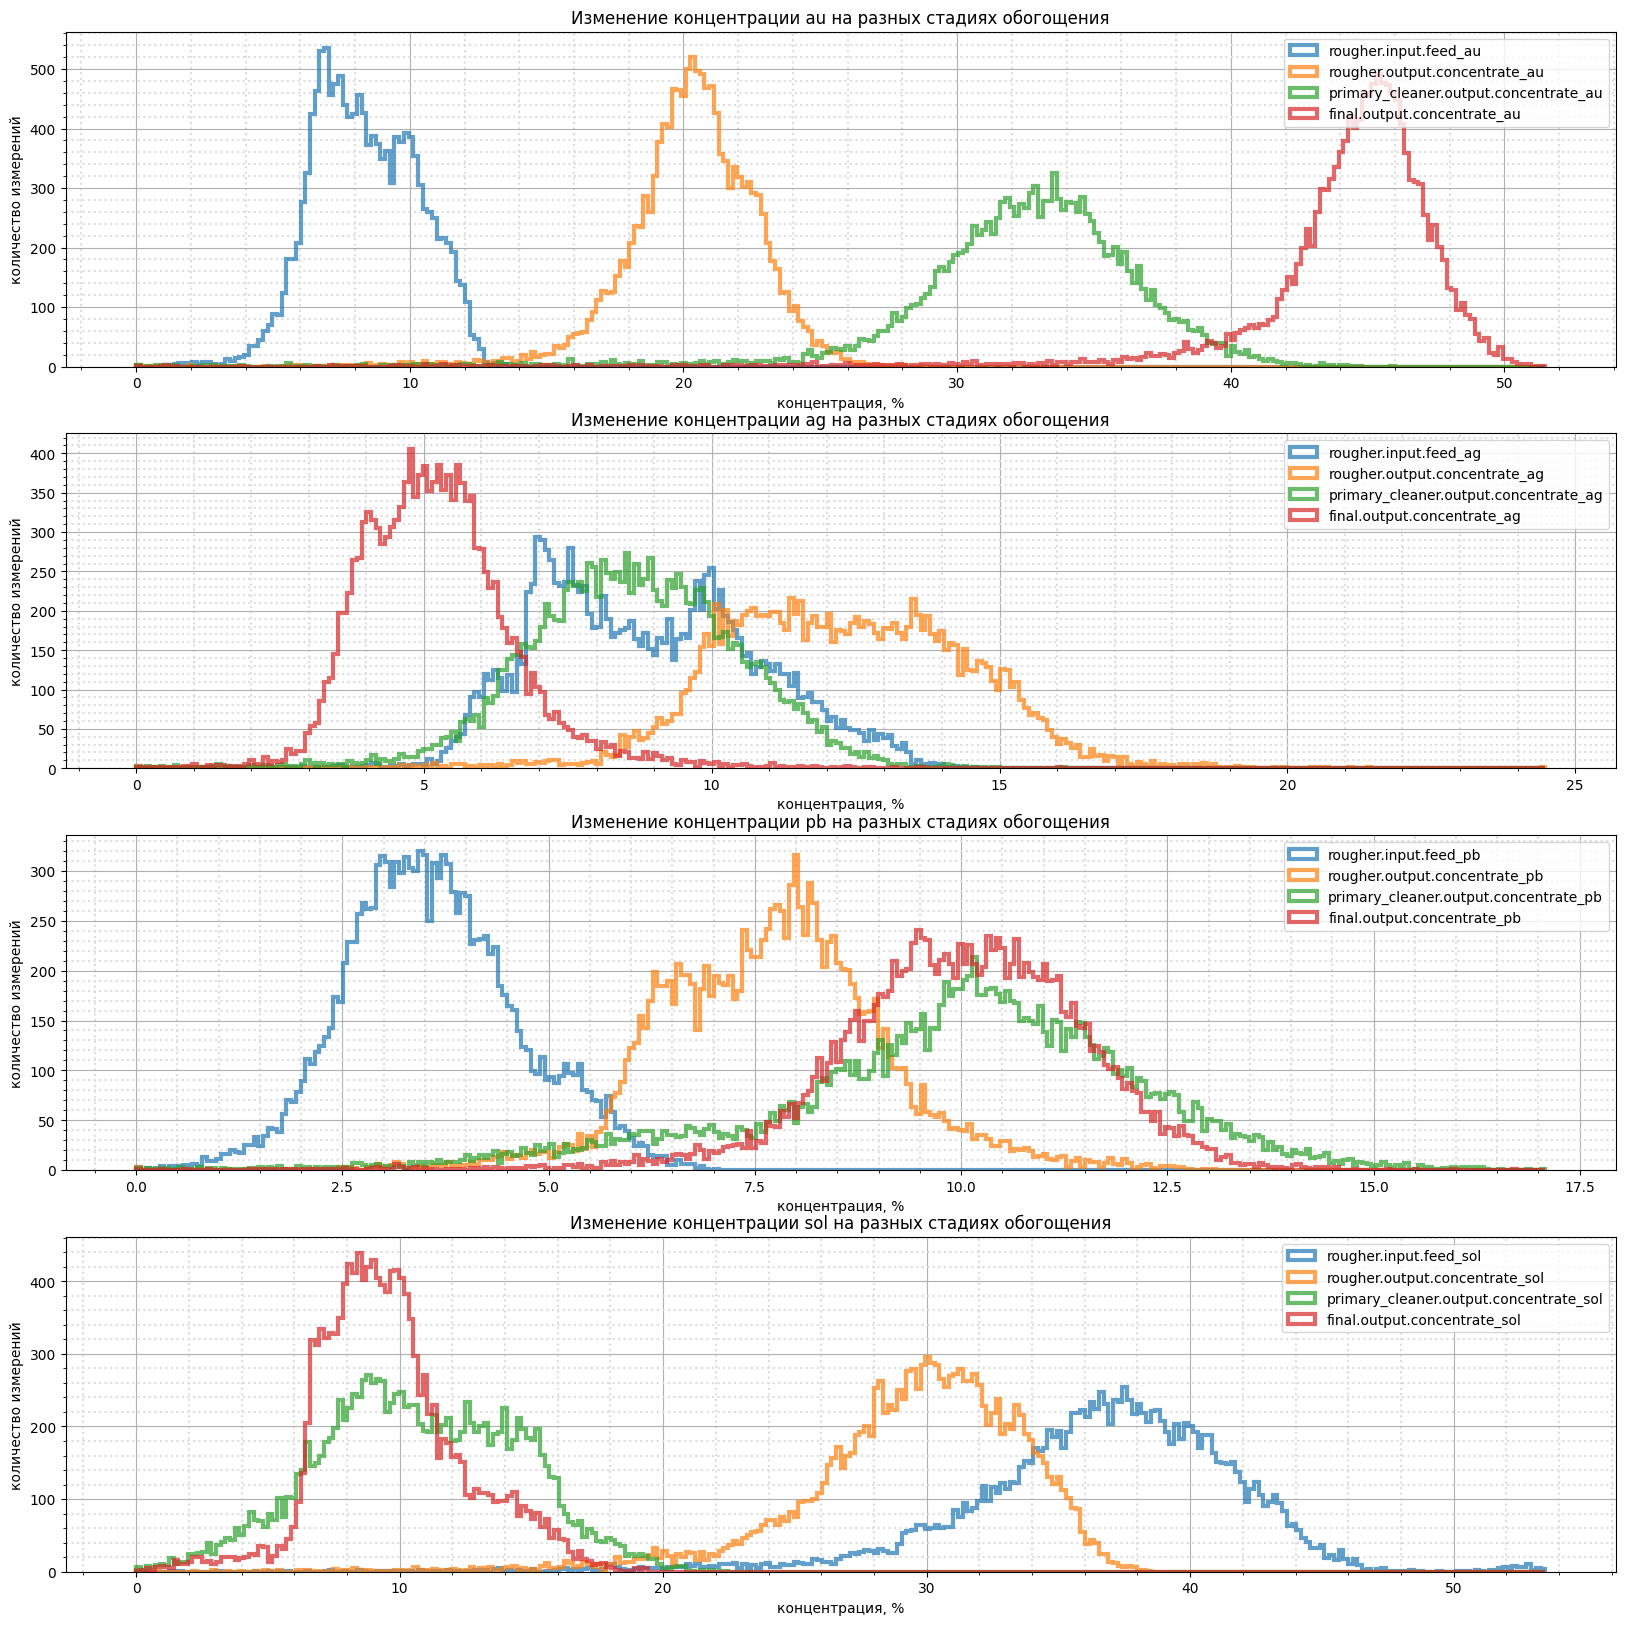

In [19]:
elements = ['au', 'ag', 'pb', 'sol']
figure, grid = plt.figure(figsize=(20, 5 * len(elements))), GridSpec(len(elements), 1)
for index, element in enumerate(elements):
    figure.add_subplot(grid[index, 0])
    filds = ['rougher.input.feed_' + element, 'rougher.output.concentrate_' + element,
          'primary_cleaner.output.concentrate_' + element, 'final.output.concentrate_' + element]
    for i in filds:
        ax = data.train[i].plot( kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=300, ax=figure.axes[index], legend = True, label=i,
            title=f'Изменение концентрации {element} на разных стадиях обогощения',
            range=[0, pd.concat([data.train[j] for j in filds]).max()])
    figure.axes[index].minorticks_on()
    figure.axes[index].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
    figure.axes[index].set_xlabel('концентрация, %')
    figure.axes[index].set_ylabel('количество измерений');

* Концентрация золота повышается на каждой стадии обогащения. На всех стадиях форма распределения в первом приближении напоминает нормальное.
* Концентрация серебра повышается после флотации, практически возвращается к исходному состоянию после первой очистки, и практически вдвое падает после второй очистки.
* Концентрация свинца последовательно повышается на стадиях флотации и первой очистки, и практически не меняется после второй очистки.
* Концентрация солей иных металлов стабильно падает после каждой ступени очистки.

<div class="alert alert-success">
    <h2> Комментарий ревьюера <a class="tocSkip"></a> </h2>

<b>Верно!👍:\
</b> Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация
</div>

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
    
2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.
</div>

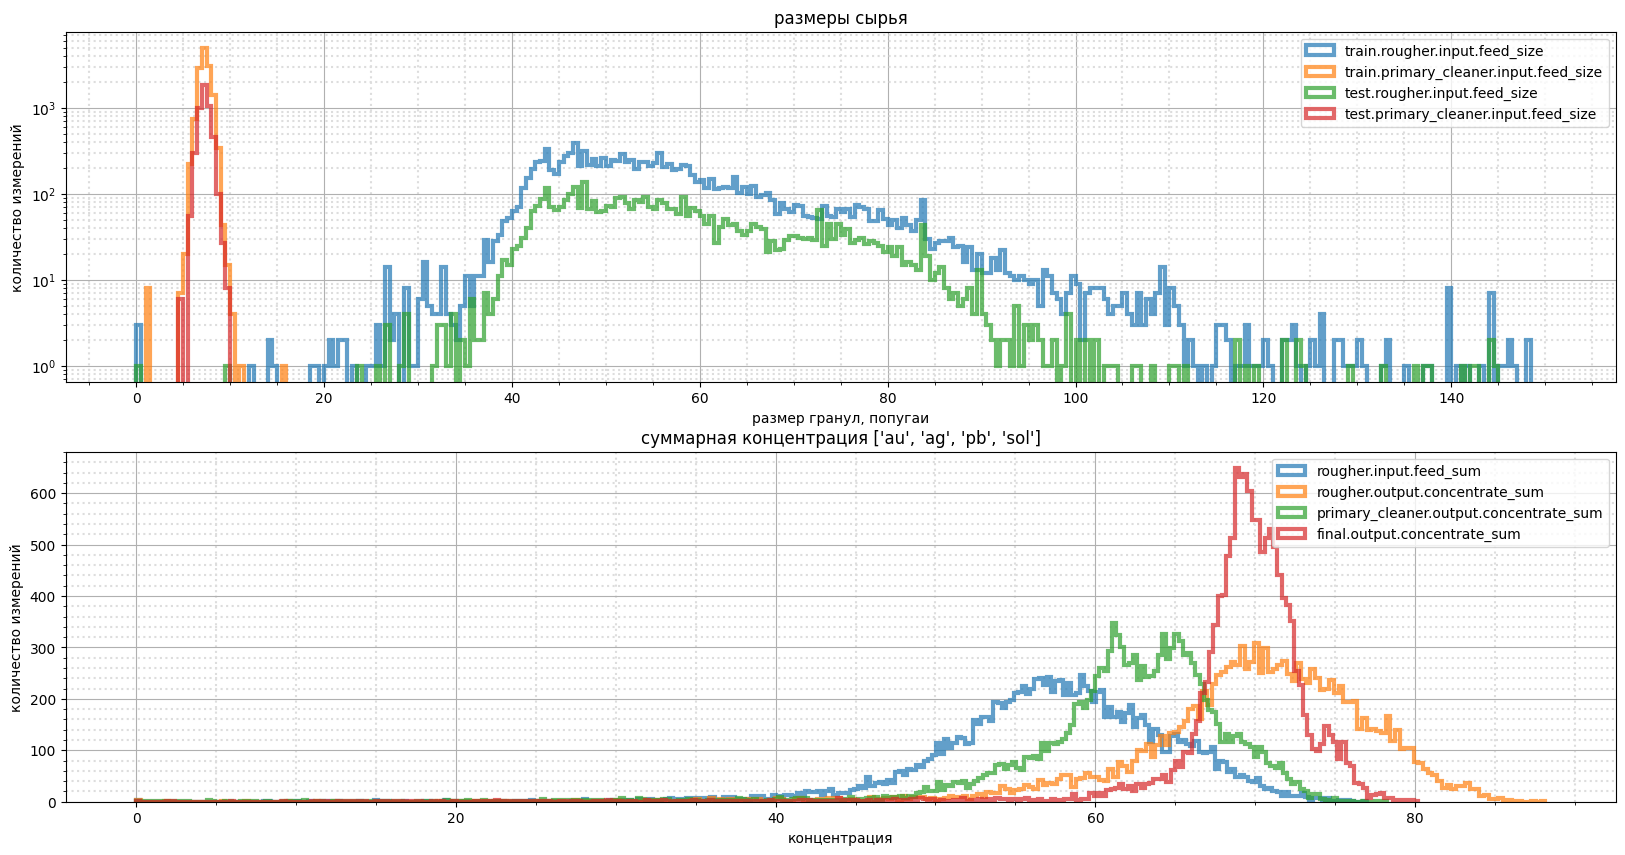

In [20]:
elements = ['au', 'ag', 'pb', 'sol']
figure, grid = plt.figure(figsize=(20, 5*2)), GridSpec(2, 1)
for i in [0, 1]: figure.add_subplot(grid[i, 0])
size_columns = data.train.columns[data.train.columns.str.contains('size')] # имеющиеся столбцы с размерами
for df in ['train', 'test']:
    for column in size_columns:
        ax = data[df][column].plot(kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=300, ax=figure.axes[0], legend = True,
            label=df + '.' + column, range=[0, 150], title=f'размеры сырья', log=True)
figure.axes[0].minorticks_on()
figure.axes[0].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[0].set_xlabel('размер гранул, попугаи')
figure.axes[0].set_ylabel('количество измерений');

filds = ['rougher.input.feed_', 'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
for stage in filds:
    fild = sum([data.train[stage + i] for i in elements])
    ax = fild.plot(kind='hist', histtype='step',
            linewidth=3, alpha=0.7, grid=True, bins=300, ax=figure.axes[1], legend = True,
            label=stage + 'sum', range=[0, fild.max()], title=f'суммарная концентрация {elements}')
figure.axes[1].minorticks_on()
figure.axes[1].grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=1.5)
figure.axes[1].set_xlabel('концентрация')
figure.axes[1].set_ylabel('количество измерений');

* распределение размеров гранул на обучающей и тестовой выборках совпадают.
* флотация повышает суммарную концентрацию металлов, первая ступень очистки понижает ее, в то время как вторая стадия очистки снова повышает суммарную концентрацию металлов (которая в среднем немного недотягивает до концентрации после флотации).

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Распределения примерно одинаковы. Для сравнения распределений выборок с разным размером лучше использовать графики плотности или kde вместо гистограмм частотности (по оси У доля относительно датасета вместо абсолютного количества). Наличие либо отсутствие разницы будет более очевидным.  Рекомендую тебе нормализовать гистограммы, например используя метод `sns.kdeplot` (в т.ч. `rougher.input.feed_size`)

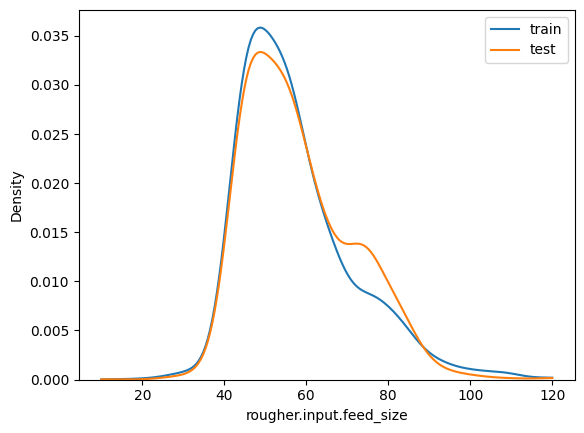

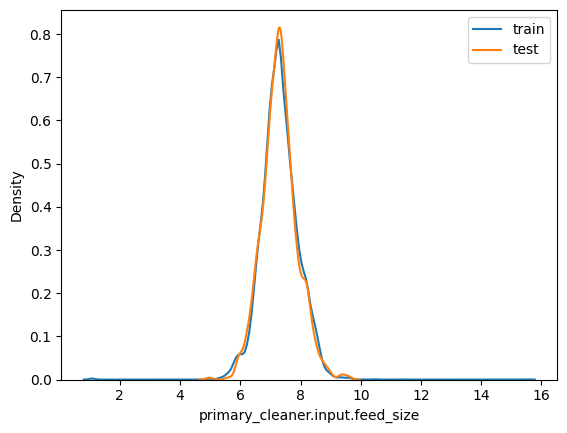

In [21]:
# эта ячейка добавлена в версии v2
for df in ['train', 'test']:
    ax = sns.kdeplot(data[df]['rougher.input.feed_size'], label=df, legend=True, clip=(10,120))
    ax.legend(loc="upper right", title=None)
plt.show()
for df in ['train', 'test']:
    ax = sns.kdeplot(data[df]['primary_cleaner.input.feed_size'], label=df, legend=True)
    ax.legend(loc="upper right", title=None)
plt.show()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* Исходное сырье незначительно поменяло гранулометрический состав. На тестовой выборке наблюдается появление дополнительного пика в р-не ~78 попугаев. Вероятно это влияние износа одной из дробилок. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Итак, суммарную концентрацию всех веществ на разных стадиях исследовали. Есть такой момент, что на гистограммах распределений суммарных концентраций имеются аномалии, и эти аномалии важно удалить по всем типам суммарных концентраций на обучающей выборке. Ведь отдельно по каждому веществу они могут быть (не всегда же есть крупинки золота в руде), а вот суммарно - вряд ли (в руде хоть что-то но будет) А если мы имеем аномалии, значит большая вероятность неточности в измерениях. Исправь, пожалуйста 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

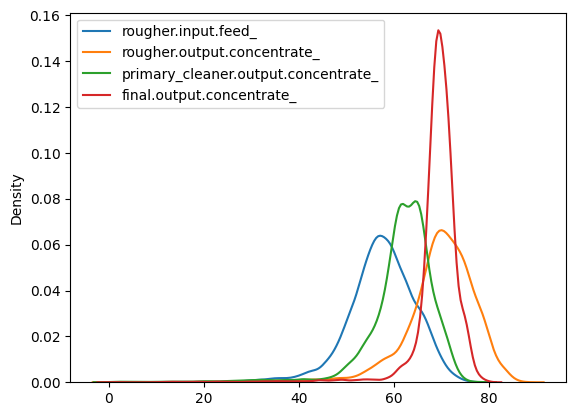

In [22]:
# эта ячейка добавлена в версии v2
elements = ['au', 'ag', 'pb', 'sol']
filds = ['rougher.input.feed_', 'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
for stage in filds:
    fild = sum([data.train[stage + i] for i in elements])
    ax = sns.kdeplot(fild, label=stage, legend=True)
    ax.legend(loc="upper left", title=None)
plt.show()

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
3.1. Напишите функцию для вычисления итоговой sMAPE.
</div>

In [23]:
def smape(*, target, predict):
    fild = abs(target - predict)/(abs(target) + abs(predict))
    return (200 * fild.sum()) / len(fild)
def smape_full(smape_rougher, smape_final):
    return (0.25 * smape_rougher) + (0.75 * smape_final)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Функция правильная) 
    
Хорошо, что делаешь все рассчеты векторно, а не в цикле. Иначе это будет занимать достаточно много времени. Если интересно, то вот статья про векторизацию в пандас: <a href = 'https://medium.com/nuances-of-programming/%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5-%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D0%BF%D0%BE-%D1%81%D1%82%D1%80%D0%BE%D0%BA%D0%B0%D0%BC-%D0%B2-pandas-dataframe-43aa7d2588cb'>статья</a> (нужен VPN для открытия)


    

## Модель

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; color:#ccc">
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.
</div>

In [24]:
columns.T

,date,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.au_pb_ratio,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.sulfate_to_au_concentrate,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
all,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
missing,False,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
present,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,T

In [25]:
def get_predict(*, df, model, param_grid={}, stage, verbose=1, preprocessor_enable=False, cv=5):
    global score_stage
    global score_df
    score_stage = stage
    score_df = df
    columns_current = columns[columns[stage] & columns.present & (~ columns['multicollinearity_'+stage])].index
    fit_param=(df[columns_current], df[[stage + '.output.concentrate_au', stage + '.output.tail_au']])
    if not preprocessor_enable: pipeline_current = Pipeline(steps = [('regressor', model)])
    else:
        preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, columns_current)])
        pipeline_current = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', model)])
    
    if verbose > 2:
        display(HTML(f"<div style='color: #aaa'>доступные гиперпараметры для выбранной модели:\
            {list(pipeline_current.get_params().keys())}<br><br>выбранны столбцы для обучения:\
            {columns_current.to_list()}</div>"))
    
    model_current = GridSearchCV(pipeline_current, verbose=verbose, param_grid=param_grid, cv=cv,
        refit=True, error_score = 'raise', scoring=score)
    
    model_current.fit(*fit_param)
    display(f"лучшие параметры: {model_current.best_params_}")
    current_score = - model_current.score(*fit_param)
    predict=pd.DataFrame(model_current.predict(df[columns_current]))
    
    # для самопроверки вычислю score другими методами
    manual_score = mean_absolute_error(df[stage + '.output.recovery'],
        recovery(c=predict[0], f=df['rougher.input.feed_au_src'], t=predict[1]))
    function_score = mae_recovery(df[stage + '.output.recovery'], predict)
    res=pd.DataFrame({'mae(recovery)':[- model_current.best_score_, current_score, manual_score,
        function_score]}, index=['best_cv_mean_score', 'this_score', 'manual_score',
        'function_score'])
    display(res)
    
    smape_current = smape(target=df[stage + '.output.recovery'],
        predict = recovery(c=predict[0], f=df['rougher.input.feed_au_src'], t=predict[1]))
    display(f'smape={smape_current}')
    return {'best_params': model_current.best_params_, 'score': current_score,
            'model': model_current, 'predict': predict, 'smape': smape_current}

In [26]:
mod = {}
mod['lr_rougher'] = get_predict(df=data.train_norm, model=LinearRegression(),
        param_grid={}, stage='rougher', verbose=1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


'лучшие параметры: {}'

,mae(recovery)
best_cv_mean_score,7.389175
this_score,5.115323
manual_score,5.115323
function_score,5.115323


'smape=5.191692711759178'

In [27]:
mod['ls_final'] = get_predict(df=data.train_norm, model=LinearRegression(),
        param_grid={}, stage='final', verbose=1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


'лучшие параметры: {}'

,mae(recovery)
best_cv_mean_score,6.912601
this_score,5.276847
manual_score,5.276847
function_score,5.276847


'smape=8.18692414645905'

In [28]:
mod['tree_rougher'] = get_predict(df=data.train_norm, model=DecisionTreeRegressor(), stage='rougher',
#     param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(5,15))}) #v1
    param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(4,17)), #v2
    'regressor__min_samples_leaf':list(range(2,14))}, verbose=1) #v2

Fitting 5 folds for each of 156 candidates, totalling 780 fits


"лучшие параметры: {'regressor__max_depth': 6, 'regressor__min_samples_leaf': 6, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,8.296906
this_score,13.531398
manual_score,13.531398
function_score,13.531398


'smape=4.859695692924105'

In [29]:
mod['tree_final'] = get_predict(df=data.train_norm, model=DecisionTreeRegressor(), stage='final',
#     param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(5,15))}) #v1
    param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(4,17)), #v2
    'regressor__min_samples_leaf':list(range(2,14))}) #v2

Fitting 5 folds for each of 156 candidates, totalling 780 fits


"лучшие параметры: {'regressor__max_depth': 8, 'regressor__min_samples_leaf': 2, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,10.007300
this_score,6.188257
manual_score,6.188257
function_score,6.188257


'smape=9.427565179444175'

In [30]:
mod['forest_rougher']  = get_predict(
    df=data.train_norm, model=RandomForestRegressor(), stage='rougher', verbose=1,
    #param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(5,15))}) #v1
    param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(4,17)), #v2
    'regressor__min_samples_leaf':list(range(2,14))}) #v2

Fitting 5 folds for each of 156 candidates, totalling 780 fits


"лучшие параметры: {'regressor__max_depth': 16, 'regressor__min_samples_leaf': 12, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,9.936122
this_score,6.016055
manual_score,6.016055
function_score,6.016055


'smape=3.483324072324207'

In [31]:
mod['forest_final']  = get_predict(
    df=data.train_norm, model=RandomForestRegressor(), stage='final', verbose=1,
    #param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(5,15))}) #v1
    param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':list(range(4,17)), #v2
    'regressor__min_samples_leaf':list(range(2,14))}) #v2

Fitting 5 folds for each of 156 candidates, totalling 780 fits


"лучшие параметры: {'regressor__max_depth': 16, 'regressor__min_samples_leaf': 2, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,9.848669
this_score,5.225894
manual_score,5.225894
function_score,5.225894


'smape=6.975362824304984'

In [32]:
# эта ячейка добавлена в версии v2
mod['dummy_rougher'] = get_predict(df=data.train_norm, model=DummyRegressor(),
        param_grid={}, stage='rougher', verbose=1)
mod['dummy_final'] = get_predict(df=data.train_norm, model=DummyRegressor(),
        param_grid={}, stage='final', verbose=1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


'лучшие параметры: {}'

,mae(recovery)
best_cv_mean_score,10.685146
this_score,9.840820
manual_score,9.840820
function_score,9.840820


'smape=6.949149855551056'

Fitting 5 folds for each of 1 candidates, totalling 5 fits


'лучшие параметры: {}'

,mae(recovery)
best_cv_mean_score,16.244311
this_score,15.595764
manual_score,15.595764
function_score,15.595764


'smape=13.710138242006348'

Выберем лучшие модели.

In [57]:
best_models={}
for stage in ['rougher', 'final']:
    tmp = pd.DataFrame(columns=['model', 'score', 'smape', 'best_param'])
    for i in mod:
        if stage in i:
            tmp.loc[len(tmp)] = [i, mod[i]['score'], mod[i]['smape'], mod[i]['best_params']]
    tmp = tmp.sort_values('smape')
    display(tmp)
    best_models[stage] = [tmp.iloc[0].model, mod[tmp.iloc[0].model]]

,model,score,smape,best_param
2,forest_rougher,6.016055,3.483324,"{'regressor__max_depth': [[[[[[[16]]]]]]], 're..."
1,tree_rougher,13.531398,4.859696,"{'regressor__max_depth': 6, 'regressor__min_sa..."
0,lr_rougher,5.115323,5.191693,{}
3,dummy_rougher,9.840820,6.949150,{}


,model,score,smape,best_param
2,forest_final,5.225894,6.975363,"{'regressor__max_depth': [[[[[[16]]]]]], 'regr..."
0,ls_final,5.276847,8.186924,{}
1,tree_final,6.188257,9.427565,"{'regressor__max_depth': 8, 'regressor__min_sa..."
3,dummy_final,15.595764,13.710138,{}


Лучшие модели - девевo, с глубиной 8 для флотации и линейная регрессия для финальной очистки соответственно. Придется еще раз обучить модель с этими параметрами, но уже используя перенормировку не общую для датасета, а в pipeline.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
* Лучшими моделями на этот раз стали леса, с гиперпараметрами глубины и количества листьев (16, 12
) и (16, 2) соответственно.
* Добавил автоматизацию предсказания (не надо модель забивать руками).
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

comment: Лучшие модели вернулись уже обученными. Пока не понял, как сбросить обучение у уже обученной модели (сохранив тип модели и гиперпараметры), поэтому забиваю руками.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Следует использовать больше одного набора гиперпараметров хотя бы для одной модели, к примеру, перебирать как `max_depth`, так и `min_samples_leaf`. Напомню, что эти наборы следует еще и перебирать (с гридсерчем или вручную с циклами). Исправь, пожалуйста

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [75]:
# эта ячейка добавлена в версии v2
final_mod = {}
for stage in ['rougher', 'final']:
    final_mod[stage] = (LinearRegression() if best_models[stage][0] == ('lr_' + stage) else
        DecisionTreeRegressor() if best_models[stage][0] == ('tree_' + stage) else
        RandomForestRegressor() if best_models[stage][0] == ('forest_' + stage) else
        DummyRegressor())
    tmp = best_models[stage][1]['best_params']
    for i in tmp:
        if type(tmp[i]) == int: tmp[i] = [tmp[i]]
        else:
            if type(tmp[i][0]) == list: tmp[i] = tmp[i][0] # немножко накосячил, перезапускать обучение не хочется
    display(f'{stage=} model={final_mod[stage]} best_param={tmp}')
    final_mod[stage] = get_predict(df=data.train, model=final_mod[stage], stage=stage, verbose=1,
            preprocessor_enable=True, param_grid=tmp)

"stage='rougher' model=RandomForestRegressor() best_param={'regressor__max_depth': [16], 'regressor__min_samples_leaf': [12], 'regressor__random_state': [1]}"

Fitting 5 folds for each of 1 candidates, totalling 5 fits


"лучшие параметры: {'regressor__max_depth': 16, 'regressor__min_samples_leaf': 12, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,9.947127
this_score,6.052206
manual_score,6.052206
function_score,6.052206


'smape=3.481514379961349'

"stage='final' model=RandomForestRegressor() best_param={'regressor__max_depth': [16], 'regressor__min_samples_leaf': [2], 'regressor__random_state': [1]}"

Fitting 5 folds for each of 1 candidates, totalling 5 fits


"лучшие параметры: {'regressor__max_depth': 16, 'regressor__min_samples_leaf': 2, 'regressor__random_state': 1}"

,mae(recovery)
best_cv_mean_score,9.857546
this_score,5.216013
manual_score,5.216013
function_score,5.216013


'smape=6.968512364641501'

In [ ]:
# v1
# final_mod = {}
# final_mod['rougher'] = get_predict(df=data.train, model=DecisionTreeRegressor(), stage='rougher',
#     param_grid={'regressor__random_state': [RANDOM_STATE], 'regressor__max_depth':[8]},
#     preprocessor_enable=True, verbose=1)
# final_mod['final'] = get_predict(df=data.train, model=LinearRegression(), stage='final',
#     param_grid={},
#     preprocessor_enable=True, verbose=1)

In [76]:
predict = {}
mae_rec = {}
smape_res = {}
for stage in ['rougher', 'final']:
    columns_current = columns[columns[stage] & columns.present & (~ columns['multicollinearity_'+stage])].index
    predict[stage] = pd.DataFrame(final_mod[stage]['model'].best_estimator_.predict(data.test[columns_current]))
    mae_rec[stage] = mae_recovery(data.test_full[stage + '.output.recovery'], predict[stage])
    smape_res[stage] = smape(target=data.test_full[stage + '.output.recovery'],
        predict = recovery(c=predict[stage][0], f=data.test['rougher.input.feed_au_src'], t=predict[stage][1]))

In [77]:
res = pd.DataFrame([mae_rec, smape_res], index = ['mae_recovery', 'smape'])
display(res.style.format('{:.1f}'))
smape_res['full'] = smape_full(smape_res['rougher'], smape_res['final'])
display(f"Итоговое sMAPE: {smape_res['full']:.1f}")


,rougher,final
mae_recovery,20.8,7.9
smape,3.8,8.8


'Итоговое sMAPE: 7.5'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование лучшей модели проведено правильно

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В каждом проекте при оценке качества модели, имеет смысл сравнивать ее с константной моделью (к примеру, которая предсказывает медиану по таргету). И в наш проект важно добавить это сравнение.  Создавать константные модели можно либо вручную, либо воспользоваться готовым алгоритмом <a href='https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html'>DummyRegressor</a> из пакета `sklearn`. 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
В конце выполнения каждой работы важно оставлять итоговый вывод, делиться какими-то рассуждениями, умозаключениями: какая задача перед тобой стояла, что было предпринято для ее выполнения и почему/для чего, с какими трудностями (особенностями данных) пришлось столкнуться, каким образом удалось с ними справиться, каких результатов удалось достичь, получилось ли у тебя реализовать задачу, поставленную в проекте. Это поможет тебе осмыслять проделанную работу полноценно, а не отдельными заданиями, список которых предоставили. В будущих проектах тебе нужно будет учиться все большей и большей самостоятельности при планировании своей работы. Осмысленное написание вывода должно помочь тебе проследить взаимосвязи между этапами, запомнить их логику.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
## Вывод

Работа состояла из нескольких этапов:
* Стадия подготовки данных:
    * проводилась проверка корректности данных, на основе которых вычисляются необходимые метрики. Метрики вычисленные по формулам совпали с теми, которые есть в датасете;
    * были удалены записи, в которых суммарная концентрация металлов была равна нулю;
    * были удалены записи, в которых при первичной очистке все концентрации металлов были равны нулю;
    * пропуски были заполнены с использованием подхода к-ближайших соседей;
    * была выполнена проверка на мультиколлиниарность;
* Стадия анализа данных:
    * была исследована концентрация металлов (Au, Ag, Pb) на различных этапах:
       * Концентрация золота повышается на каждой стадии обогащения. На всех стадиях форма распределения в первом приближении напоминает нормальное.
       * Концентрация серебра повышается после флотации, практически возвращается к исходному состоянию после первой очистки, и практически вдвое падает после второй очистки.
       * Концентрация свинца последовательно повышается на стадиях флотации и первой очистки, и практически не меняется после второй очистки.
       * Концентрация солей иных металлов стабильно падает после каждой ступени очистки.  
    * было произведено сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках:
       * Исходное сырье незначительно поменяло гранулометрический состав. На тестовой выборке наблюдается появление дополнительного пика в р-не ~78 попугаев. Вероятно это влияние износа одной из дробилок.
    * была исследована суммарная концентрация металлов на разных стадиях:
       * флотация повышает суммарную концентрацию металлов, первая ступень очистки понижает ее, в то время как вторая стадия очистки снова повышает суммарную концентрацию металлов (которая в среднем немного недотягивает до концентрации после флотации);
       * записей, с суммарной концентрацией металлов менее 35% следовое колличество;
* Стадия построения модели:
    * для построения итоговой модели использовалось 2 различные лучшие модели: отдельно для стадии флотации, и отдельно для финальной очистки;
    * лучшие модели выбиралась из следующих моделей: LinearRegression, DecisionTreeRegressor, RandomForestRegressor, DummyRegressor. Из них в моделях, которые поддерживают различные гиперпараметры, были выбраны гиперпараметры дающие наилучший результат.
    * На тестовой выборке достигнуто значение sMAPE = 7.5
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким объемным и сложным проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в ML, то могу посоветовать тебе: 
    
- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/   
    
- Книжка от ШАД: https://academy.yandex.ru/handbook/ml/
    
- Также рекомендую лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN
- Избежать утечки данных при кросс-валидации тебе поможет <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">конвеерная обработка данных</a>.     
    
- Не все признаки приносят пользу при моделировании. Инструмент <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> поможет тебе отобрать важные признаки и избавит от ручной обработки.  Также можешь посмотреть статью на <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a> (она сложнее).    
    
    
В этом проекте были отработаны несколько моментов. А самый очевидный: заметно, что разность метрик качества (константной и нашей модели) -  не слишком большая. Такое расхождение метрик допустимо в этом проекте. Что тогда  для дальнейшего улучшения качества моделирования возможно тут пересмотреть?
Попробую описать для тебя:
1. Качество данных на входе модели машинного обучения: повторно оценить аномалии, пропуски, соответствие законам химии и физики, все ли правдоподобно?
2. Работа с моделями машинного обучения:
- Создание новых признаков для моделей, Features Engineering: возможно стоит обратиться к технологу производства и ещё раз пробежаться по бизнес-цепочке процесса.
- Отбор самих моделей машинного обучения и гиперпараметров.
    
3. Параметры производственного процесса, к примеру: температура сырья, скорость ленточного конвейера, и.т.п.
    

Если провести Анализ измерительных систем, или MSA, то можно разобраться в причинах неточности полученных с производства данных. Статистический анализ данных, или SPC, - тоже будет являться незаменимым помощником в решении нашей задачи.
    
Добавлю здесь, что цель нашего проекта достигнута, а именно пройдены важные этапы подготовки данных и построения модели для производства золота.
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке